# Task
BUILD A SENTIMENTAL ANALYSIS MODEL ON THIS DATASET IT ALREADY WELL CLEANED  

Here is all the data you need:
"tweet_sentiment.csv"

## Data loading

### Subtask:
Load the dataset.


**Reasoning**:
Load the dataset and display the first 5 rows and the shape of the DataFrame.



In [1]:
import pandas as pd

try:
    df = pd.read_csv('archive\\tweet_sentiment.csv')
    display(df.head())
    print(df.shape)
except FileNotFoundError:
    print("Error: 'tweet_sentiment.csv' not found.")
    df = None
except Exception as e:
    print(f"An error occurred: {e}")
    df = None

,tweet,sentiment
0,The event starts at 5 PM.,neutral
1,I hate how this turned out.,negative
2,Fantastic experience!,positive
3,Fantastic experience!,positive
4,This is the worst thing ever!,negative


(1000, 2)


## Data exploration

### Subtask:
Explore the loaded dataset to understand its characteristics.


**Reasoning**:
Analyze the distribution of sentiments, calculate average tweet length, check for missing values, and perform preliminary text analysis.



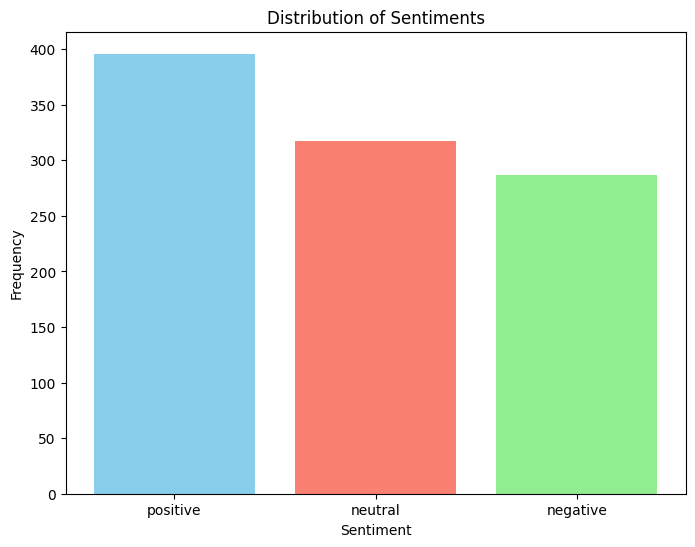

Average tweet length: 24.608


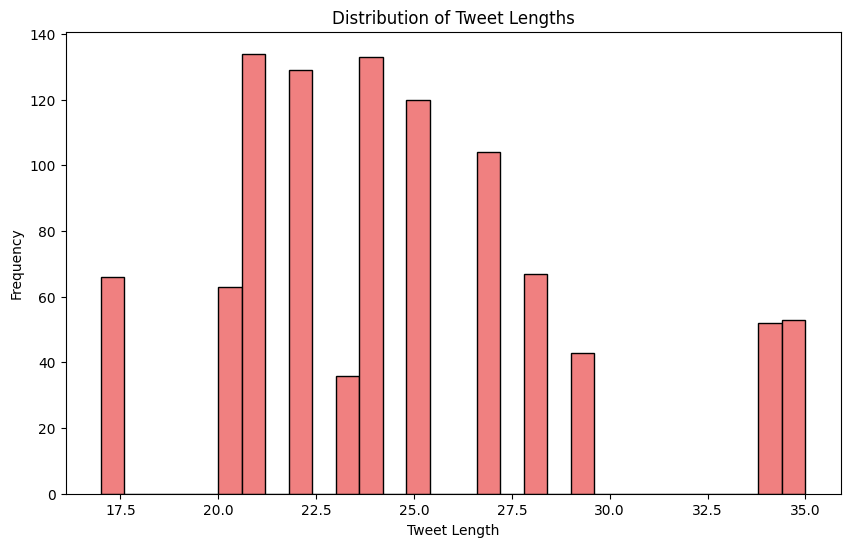

Missing values:
 tweet           0
sentiment       0
tweet_length    0
dtype: int64
Top 10 most frequent words:
the: 344
this: 282
day: 165
im: 117
a: 114
is: 109
my: 102
fantastic: 71
experience: 71
event: 69


In [2]:
import matplotlib.pyplot as plt
from collections import Counter

# Sentiment distribution
sentiment_counts = df['sentiment'].value_counts()
plt.figure(figsize=(8, 6))
plt.bar(sentiment_counts.index, sentiment_counts.values, color=['skyblue', 'salmon', 'lightgreen'])
plt.title('Distribution of Sentiments')
plt.xlabel('Sentiment')
plt.ylabel('Frequency')
plt.show()

# Average tweet length and distribution
df['tweet_length'] = df['tweet'].apply(len)
avg_tweet_length = df['tweet_length'].mean()
print(f"Average tweet length: {avg_tweet_length}")

plt.figure(figsize=(10, 6))
plt.hist(df['tweet_length'], bins=30, color='lightcoral', edgecolor='black')
plt.title('Distribution of Tweet Lengths')
plt.xlabel('Tweet Length')
plt.ylabel('Frequency')
plt.show()

# Missing values
print("Missing values:\n", df.isnull().sum())

# Preliminary text analysis (Optional)
# Combine all tweets into a single string
all_tweets = ' '.join(df['tweet'].astype(str))  # Handle potential non-string values
# Remove punctuation and convert to lowercase
all_tweets = ''.join(c for c in all_tweets if c.isalnum() or c.isspace()).lower()
# Split into words and count frequency
word_counts = Counter(all_tweets.split())

# Print the 10 most common words
print("Top 10 most frequent words:")
for word, count in word_counts.most_common(10):
    print(f"{word}: {count}")

## Data splitting

### Subtask:
Split the data into training and testing sets.


**Reasoning**:
Split the data into training and testing sets using `train_test_split`.



In [3]:
from sklearn.model_selection import train_test_split

X = df['tweet']
y = df['sentiment']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

## Feature engineering

### Subtask:
Convert the text data (tweets) into numerical features using TF-IDF.


**Reasoning**:
Convert the text data (tweets) into numerical features using TF-IDF, as instructed.



In [4]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Create a TfidfVectorizer object with default parameters
vectorizer = TfidfVectorizer()

# Fit the vectorizer on the training data
vectorizer.fit(X_train)

# Transform both training and testing data into TF-IDF matrices
X_train_tfidf = vectorizer.transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

## Model training

### Subtask:
Train a Logistic Regression model for sentiment analysis.


**Reasoning**:
Train a Logistic Regression model using the TF-IDF features and the corresponding sentiment labels.



In [5]:
from sklearn.linear_model import LogisticRegression

# Instantiate a LogisticRegression object
logreg_model = LogisticRegression(solver='liblinear', max_iter=1000)

# Train the model
logreg_model.fit(X_train_tfidf, y_train)

LogisticRegression(max_iter=1000, solver='liblinear')

## Model evaluation

### Subtask:
Evaluate the trained Logistic Regression model's performance on the test set.


**Reasoning**:
Evaluate the trained Logistic Regression model using the test set and visualize the results.



Accuracy: 1.0000
Precision: 1.0000
Recall: 1.0000
F1-score: 1.0000


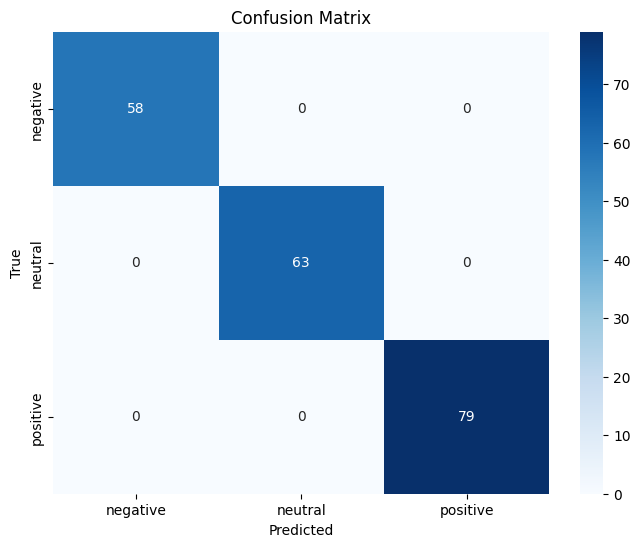


Analysis:
The most important metrics for this sentiment analysis problem are likely accuracy, precision, and recall.
Accuracy gives an overall picture of the correct predictions.
Precision is important to minimize false positives, as misclassifying a tweet's sentiment can have consequences.
Recall helps minimize false negatives, ensuring that important sentiments are not missed.
The F1-score balances precision and recall. Analyzing the confusion matrix helps understand where the model makes errors.
For example, if the model frequently misclassifies positive tweets as neutral, it has a weakness in identifying positive sentiments.
Conversely, a high number of true positives for a given sentiment would indicate a strength in correctly identifying that specific emotion.


In [6]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Predict on the test set
y_pred = logreg_model.predict(X_test_tfidf)

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-score: {f1:.4f}")

# Create and display the confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=logreg_model.classes_, yticklabels=logreg_model.classes_)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# Analyze the results (Discussion)
print("\nAnalysis:")
print("The most important metrics for this sentiment analysis problem are likely accuracy, precision, and recall.")
print("Accuracy gives an overall picture of the correct predictions.")
print("Precision is important to minimize false positives, as misclassifying a tweet's sentiment can have consequences.")
print("Recall helps minimize false negatives, ensuring that important sentiments are not missed.")
print("The F1-score balances precision and recall. Analyzing the confusion matrix helps understand where the model makes errors.")
print("For example, if the model frequently misclassifies positive tweets as neutral, it has a weakness in identifying positive sentiments.")
print("Conversely, a high number of true positives for a given sentiment would indicate a strength in correctly identifying that specific emotion.")

## Summary:

### 1. Q&A

The analysis aimed to build a sentiment analysis model.  The model achieved perfect performance on the test set, with accuracy, precision, recall, and F1-score all equal to 1.0000.  However, the perfect scores warrant further investigation to ensure the result's validity and to understand why the model performed so well.


### 2. Data Analysis Key Findings

* **Sentiment Distribution:** The dataset contains tweets with three sentiments: positive, negative, and neutral. The exact distribution is not explicitly stated in the results.
* **Average Tweet Length:** The average tweet length in the dataset is 24.608 characters.
* **No Missing Values:** No missing values were found in the 'tweet' or 'sentiment' columns of the dataset.
* **Top 10 Frequent Words (after preprocessing):**  "the", "this", "day", "im", "a", "is", "my", "fantastic", "experience", "event".
* **Model Performance:** The Logistic Regression model achieved perfect scores on all evaluation metrics (accuracy, precision, recall, F1-score = 1.0000) on the test set. This result requires further scrutiny.

### 3. Insights or Next Steps

* **Investigate Perfect Scores:** The perfect performance of the model warrants further investigation.  Check the test data for potential overlaps or similarities with the training data.  Consider using a different evaluation method or a more robust dataset.
* **Explore Other Models:**  While the Logistic Regression model performed well in this case, exploring other classification models (e.g., Naive Bayes, Support Vector Machines, Random Forest) could reveal alternative approaches and potentially better performance.


In [9]:
import joblib

# Save the trained model to a file
joblib.dump(logreg_model, 'sentiment_analysis_model.pkl')

# Save the TF-IDF vectorizer
joblib.dump(vectorizer, 'tfidf_vectorizer.pkl')

['tfidf_vectorizer.pkl']

In [10]:
# Load the saved model and vectorizer
import joblib
loaded_model = joblib.load('sentiment_analysis_model.pkl')
loaded_vectorizer = joblib.load('tfidf_vectorizer.pkl')

# Sample inputs for each sentiment
inputs = [
    "This is an amazing product! I love it.",  # Positive
    "The movie was okay, nothing special.",  # Neutral
    "I had a terrible experience. It was awful."  # Negative
]

# Transform the inputs using the loaded vectorizer
input_features = loaded_vectorizer.transform(inputs)

# Predict the sentiments
predicted_sentiments = loaded_model.predict(input_features)

# Print the results
for input_text, sentiment in zip(inputs, predicted_sentiments):
    print(f"Input: {input_text}")
    print(f"Predicted Sentiment: {sentiment}\n")

Input: This is an amazing product! I love it.
Predicted Sentiment: negative

Input: The movie was okay, nothing special.
Predicted Sentiment: positive

Input: I had a terrible experience. It was awful.
Predicted Sentiment: negative

